# IBM DATA SCIENCE SPECIALIZATION: FINAL PYTHON PROJECT

### PROJECT FOR A HOUSING AGENCY IN BOSTON

CREATED BY: Eniko/hecatchi

DATE: 2023/11/26

**Project Case Scenario:**  You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?

- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

### Dataset variables

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per 10,000 dollar
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in 1000 dollars

### Setting up Python environment with the necessary packages

In [27]:
! mamba install pandas==1.3.3
! mamba install numpy=1.21.2
! mamba install scipy=1.7.1-y
!  mamba install seaborn=0.9.0-y
!  mamba install matplotlib=3.4.3-y
!  mamba install statsmodels=0.12.0-y


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pandas==1.3.3']

[+] 0.0s
opt/ibm/custom-channels/meta-wscloud/linux-64 ━━━━━━╸━━━━━━━━━━━━━   0.0

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Exploratory Data Analysis

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [8]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Boxplot for the median value of owner-occupied homes

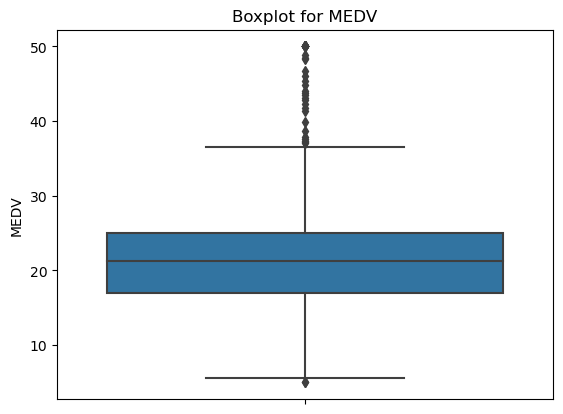

In [10]:
# For the "Median value of owner-occupied homes" provide a boxplot

ax = sns.boxplot(y="MEDV", orient="v", data=boston_df).set(title='Boxplot for MEDV')
plt.show()

## Bar plot for the Charles river variable

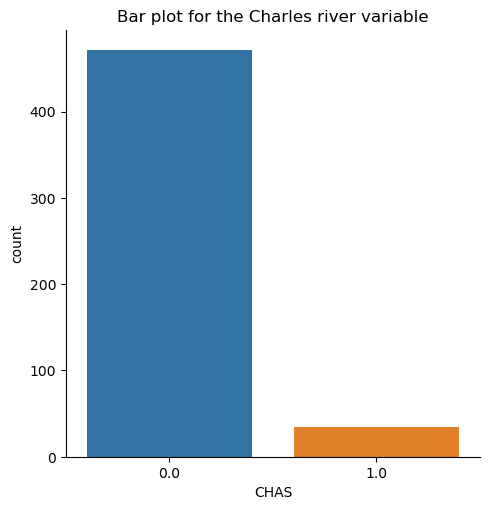

In [11]:
# Provide a bar plot for the Charles river variable
#  1 if tract bounds river; 0 otherwise

ax = sns.catplot(x="CHAS", kind='count', data=boston_df).set(title='Bar plot for the Charles river variable')
plt.show()

## MEDV variable vs the AGE variable

In [12]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


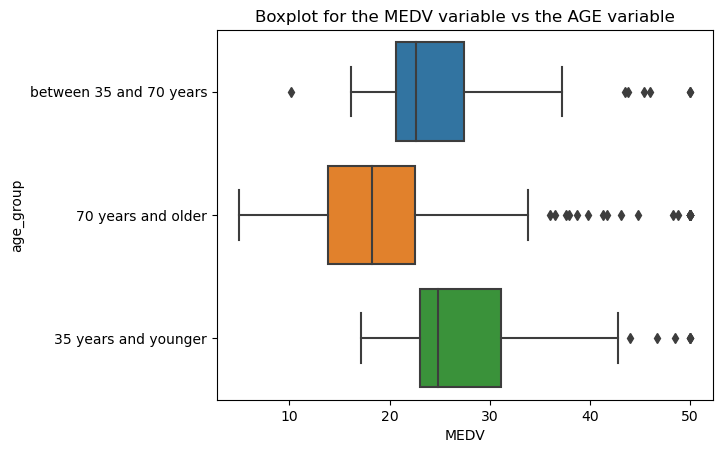

In [13]:
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df).set(title="Boxplot for the MEDV variable vs the AGE variable")
plt.show()

## Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

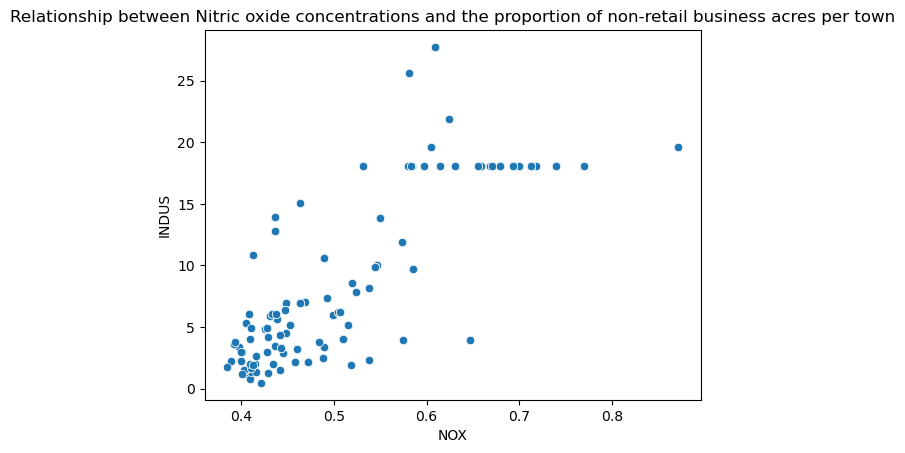

In [14]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title="Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

According to the scatterplot, there seems to be a relationship between the Nitric oxide concentrations and the proportion of non-retail business acres per town. Where the NOX value is under about 7, there seem to be a lot more non-retail business acres per town. We can either conclude, that non-retail businesses are, where the NOX value is low, or conclude, that the NOX value is lower, because the proportion of non-retail businesses are higher.

## Pupil to teacher ratio variable

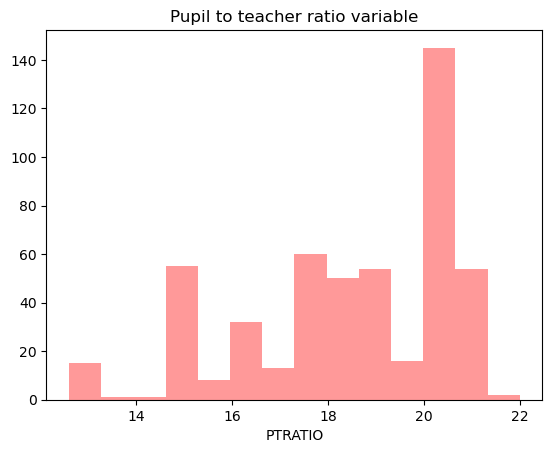

In [15]:
# Create a histogram for the pupil to teacher ratio variable

ax = sns.distplot(boston_df['PTRATIO'], color='red', kde=False).set(title="Pupil to teacher ratio variable")
plt.show()

# Using appropriate Statistical Tests to answer the following questions

- Is there a significant difference in median value of houses bounded by the Charles river or not?
- Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not?

**Hypothesis:**
* $H\_0$: $x = µ\_1$ ("There is no difference in median value of houses bounded by the Charles river")

* $H\_1$: $x ≠ µ\_1$ ("There is a difference in median value of houses bounded by the Charles river")

In [16]:
# Is there a significant difference in median value of houses bounded by the Charles river or not?
# T-test for independent samples

import scipy.stats

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0] ['MEDV'],
                   boston_df[boston_df['CHAS'] == 1] ['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

P-value: 0.003238119367639829

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

## Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?

In [17]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
# ANOVA

**Hypothesis:**

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ ("The three age groups means are equal")
*   $H\_1:$ ("At least one of the means differ")

We test for equality of variance:

In [18]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

P-value=0.06295337343259205

Since the p-value is greater than 0.05, the variances are equal. We move forward.

First, lets separate the three samples (one for each age category) into a variable each.

In [19]:
thiryfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirty_sevety = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
sevety_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

Run a one-way ANOVA

In [20]:
f_statistic, p_value = scipy.stats.f_oneway(thiryfive_lower, thirty_sevety, sevety_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


P-Value: 1.7105011022702984e-15

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis as there is a significant evidence that at least one of the means differ.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

In [21]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
# Pearson Correlation

**Hypothesis:**

*   $H\_0:$ Nitric oxide concentration is not correlated with the proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentration is correlated with the proportion of non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot(as we already did above).

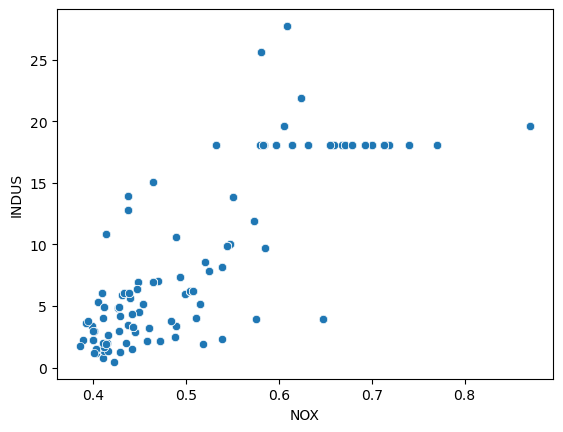

In [22]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.show()

In [23]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

P-value=7.913361061239527e-98

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? 

In [24]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?
# Regression analysis

**Hypothesis:**
    
*   $H\_0: β1$ = 0 ("Additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes")
*   $H\_1: β1$ is not equal to 0 (Additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes")

In [29]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        14:55:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there is a relationship between DIS and MEDV. Additional weighted distance to the five Boston employment centres has an inpact on the median value of owner occupied homes.